In [27]:
import numpy as np
import pandas as pd

file_to_load = "/Users/chrissy/Documents/CG_Data_Science/class_work/belize_airbnb_listings.csv"
belize = pd.read_csv(file_to_load)

belize_df = pd.DataFrame(belize)
belize_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.747860,-88.023980,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.748320,-88.024740,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.732210,-88.038240,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.521140,-88.369260,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.741660,-88.023950,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364


### 1. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

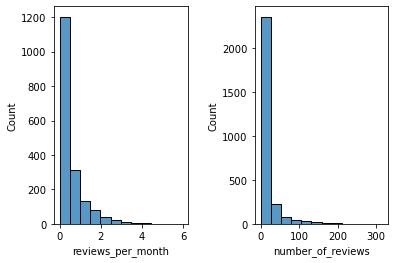

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

sns.histplot(ax=axes[0], x='reviews_per_month', data=belize_df, bins=12)
sns.histplot(ax=axes[1], x='number_of_reviews', data=belize_df, bins=12)
plt.subplots_adjust(wspace=0.5)
plt.show()

I chose to bin the data for both plots into 12 chunks.  For the reviews_per_month plot, this is essentially binning by increments of 0.5.  Originally I was going to bin by positive integers, as generally guests aren't leaving a fraction of a review.  However, I realized that the reviews_per_month field contains averages and thus some floats.  I like the additional granularity that incrementing by 0.5 provides over binning by whole numbers, but isn't as granular as automatically generated bins, which get a bit overwhelming:

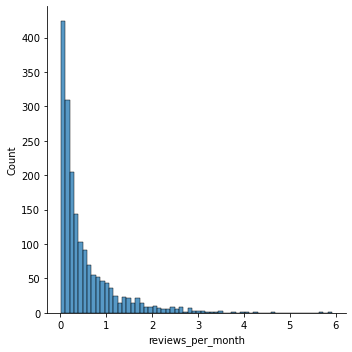

In [14]:
sns.displot(x='reviews_per_month', data=belize_df)
plt.show()

I chose to also bin the number_of_reviews data into 12 chunks for consistency and so one can observe that the data sets have similar exponential shapes (even if the scale of number_of_reviews is larger).

### 2. Create a box and whisker plot for availability_365. What does this show you?

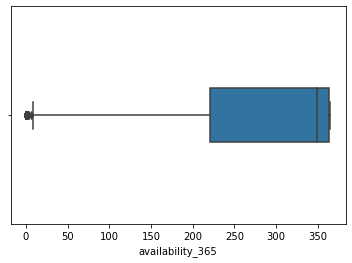

In [25]:
sns.boxplot(x='availability_365', data=belize_df, width=0.25)
plt.show()

This plot shows that the data skews high, with the 2nd quartile, 3rd quartile, and max values all falling between 348 and 366.  (It makes sense that the max value = 365, as that is the number of days in a year.)  There are enough low-lying outliers that pull the mean down to 280.32, compared to a median of 349.  We can verify what we observe on the boxplot by running .describe() on the availability_365 dataset:

In [26]:
availabilitydf = belize_df['availability_365']
availabilitydf.describe()

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64

### 3. What is the probability that the price for an Airbnb is under $50?

In [42]:
cheap_rate = belize_df['price'] < 50

less_than_50 = belize_df[cheap_rate]
less_than_50.sort_values('availability_365')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
607,16844447,Belize Homestead long term rental,97861043,Dee,Cayo,Cayo,17.28160,-89.08795,Entire home/apt,40,30,0,NaN,NaN,1,0
1706,32938117,Cozy and clean in a central location,149872304,Karryn,Belize,Belize Mainland,17.50341,-88.19110,Private room,48,1,2,9/23/2019,0.09,9,15
1921,37093965,The Rental Hub 1 (With A/C),60799371,Ranjit,Belize,Belize Mainland,17.50457,-88.19621,Private room,40,1,29,3/28/2020,1.53,3,24
912,21693610,Dorm Bed in San Ignacio,145194031,Francisco & Nelli,Cayo,Cayo,17.16216,-89.06854,Shared room,24,2,36,3/5/2020,0.93,5,52
1947,37597404,The Rental Hub 2 (With A/C),60799371,Ranjit,Belize,Belize Mainland,17.50457,-88.19621,Private room,40,1,28,3/17/2020,1.50,3,55
1915,36947257,The Rental Hub # 3 (With A/C ),60799371,Ranjit,Belize,Belize Mainland,17.50623,-88.19206,Private room,40,1,22,3/14/2020,1.55,3,55
2009,38615235,Simple Comfort #2,121129838,Ixora,Cayo,Cayo,17.15342,-89.07903,Entire home/apt,30,2,8,3/16/2020,0.53,3,87
2782,48216307,Almond Hill home with a view,389033375,Melanie,Belize,Belize Mainland,17.41699,-88.31700,Private room,24,1,0,NaN,NaN,1,89
2015,38718657,Simple Comfort #1,295902593,Fernanda,Cayo,Cayo,17.15128,-89.07975,Private room,40,2,10,2/1/2020,0.58,2,90
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115


In [40]:
less_than_50.count()

id                                49
name                              49
host_id                           49
host_name                         49
neighbourhood_group               49
neighbourhood                     49
latitude                          49
longitude                         49
room_type                         49
price                             49
minimum_nights                    49
number_of_reviews                 49
last_review                       41
reviews_per_month                 41
calculated_host_listings_count    49
availability_365                  49
dtype: int64

In [41]:
prob_under_50 = 49/2796
prob_under_50

0.017525035765379112

3a. What do you notice about these records? Hint: look at the other columns

Most of these records describe private or shared rooms (vs. entire home/apt, etc.).  They also tend to have pretty open availability, with several properties listing a complete availability of 365.  It may be that the managers of these properties have lowered their rental rates in hopes of getting more bookings and lowering that availability number.

3b. What distribution does this data most closely fit?

The right half of a quadratic distribution?  Or a left-skewed normal distribution?

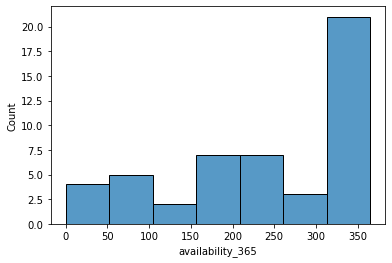

In [51]:
sns.histplot(x='availability_365', data=belize_df[cheap_rate])
plt.show()

4. Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [55]:
np.var(less_than_50['availability_365'], ddof = 1)

14795.17176870748

In [56]:
np.std(less_than_50['availability_365'], ddof=1)

121.63540507889748

In [57]:
np.var(less_than_50['calculated_host_listings_count'], ddof = 1)

21.153061224489793

In [58]:
np.std(less_than_50['calculated_host_listings_count'], ddof=1)

4.59924572343007

In [67]:
np.var(less_than_50['reviews_per_month'], ddof = 1)

0.6358771951219513

In [68]:
np.std(less_than_50['reviews_per_month'], ddof=1)

0.797419083745775

In [59]:
np.var(less_than_50['number_of_reviews'], ddof = 1)

640.3146258503403

In [60]:
np.std(less_than_50['number_of_reviews'], ddof=1)

25.304438856657942

In [61]:
np.var(less_than_50['minimum_nights'], ddof = 1)

73.18877551020412

In [62]:
np.std(less_than_50['minimum_nights'], ddof=1)

8.555043863721806

In [69]:
np.var(less_than_50['price'], ddof = 1)

62.27210884353738

In [70]:
np.std(less_than_50['price'], ddof=1)

7.891267885678282

In [63]:
np.var(less_than_50['latitude'], ddof = 1)

0.11468027925102059

In [64]:
np.std(less_than_50['latitude'], ddof=1)

0.33864476852746533

In [65]:
np.var(less_than_50['longitude'], ddof = 1)

0.15537590276250052

In [66]:
np.std(less_than_50['longitude'], ddof=1)

0.3941775015935087

In [71]:
np.var(less_than_50['host_id'], ddof = 1)

8225836807156487.0

In [72]:
np.std(less_than_50['host_id'], ddof=1)

90696399.08594215

In [73]:
np.var(less_than_50['id'], ddof = 1)

135954215836317.75

In [74]:
np.std(less_than_50['id'], ddof=1)

11659940.64463099

4a. a. Why sample variance and not population variance?

Population variance should only be used on full populations, not a sample - this dataset is a sample of the belize population.

4b. What is your takeaway for each metric?

Availability: large variance = large spread (makes sense, as these values cover the entire possible range of days out of a year, 0 to 365)

Calculated Host listings: pretty small variance = fairly small spread (values range from 1 to 16)

Reviews per Month: very small variance = very small spread (minimum of 0 reviews, max of 2.94)

Price: small-ish variance, small-ish spread (range = 20s-40s)

Number of Reviews: moderate variance = moderate spread (minimum of 0, max of 126)

Minimum Nights: fairly small variance = fairly small spread (minimum of 1, max of 30)

Host ID, ID: ginormous variance = ginormous spread (makes sense, there are a ton of AirBNBs around the world)

Latitude and Longitude: very small variance = very small spread (makes sense - all locations within bounds of Belize, a country of only 8,867 square miles)

4c. What are the scales of measurement for each of these values? 

Availability, Calculated Host Listings, Reviews per Month, Number of Reviews, Minimum Nights: ratio

Latitude, Longitude: interval

Host ID, ID: nominal

5. What percent of Airbnb listings in Belize are available 360 days a year or more?

39.52%

In [77]:
very_available = belize_df['availability_365'] >= 360
very_available_df = belize_df[very_available]
very_available_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.732210,-88.038240,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.253950,-88.768700,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.162610,-89.069950,Private room,286,1,40,2/3/2020,0.47,8,362
22,308361,Villa San Juan,1586187,Jorge Omar,Cayo,Cayo,17.258120,-88.778950,Private room,210,1,4,8/24/2018,0.05,1,365
26,521581,Heart of Belize City: Live-Work-Play,345885,Melissa,Belize,Belize Mainland,17.507510,-88.187910,Entire home/apt,482,4,3,2/1/2020,0.03,4,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,48210619,1 BR BEACHFRONT ROOM W/ SHARED BATHROOM + LIVING,372602323,Faith,Belize,Belize Islands,17.918140,-87.961630,Private room,121,1,0,NaN,NaN,4,365
2781,48210693,1 BR BEACHFRONT ROOM FOR 3 - PRIV. BATH + BALCONY,372602323,Faith,Belize,Belize Islands,17.917370,-87.963820,Private room,151,1,0,NaN,NaN,4,363
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364


In [79]:
very_available_pct = 1105/2796
very_available_pct

0.3952074391988555

5a. 360 days or less?

60.47%

In [80]:
less_available_pct = (2796-1105)/2796
less_available_pct

0.6047925608011445

5b. What distribution does this data most closely fit?

Less Available is kind of an upside-down normal distribution.  Very Available does a left-skewed normal distribution/right half of a quadratic thing similar to the Less than $50 dataset.

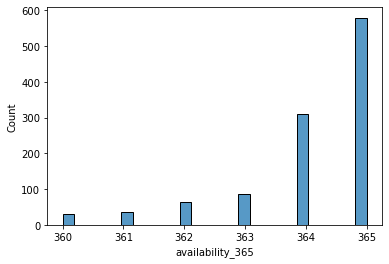

In [82]:
sns.histplot(x='availability_365', data=belize_df[very_available])
plt.show()

In [83]:
less_available = belize_df['availability_365'] <= 360
less_available_df = belize_df[less_available]
less_available_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,48266532,Dynamite Apt w/ pool on Beach Front,144478335,Brandon,Belize,Belize Islands,17.73974,-88.02615,Entire home/apt,90,2,0,NaN,NaN,4,358
2789,48279157,Hummingbird pink one bedroom cabin with pool,604999,Bobbi,Belize,Belize Islands,17.73767,-88.02747,Entire home/apt,118,2,0,NaN,NaN,22,348
2790,48282452,"Garden apt w/porch, kitchen, AC, WIFI, bikes, ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52614,-88.36710,Entire home/apt,121,7,0,NaN,NaN,5,188
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.94569,-87.94462,Entire home/apt,1054,3,0,NaN,NaN,2,347


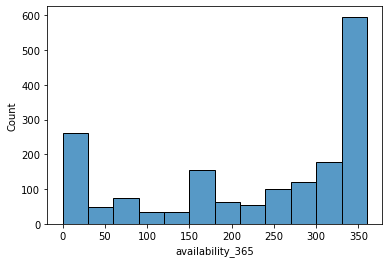

In [84]:
sns.histplot(x='availability_365', data=belize_df[less_available])
plt.show()

6. What minimum night count are 75% of Airnbnb listing in Belize greater than?

3 nights

In [88]:
min_nights = belize_df['minimum_nights']
min_nights.describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64